### Data Set provided by Informa B.V.
##### Pharmacy Sales
#### Goal: Forecast Sales  

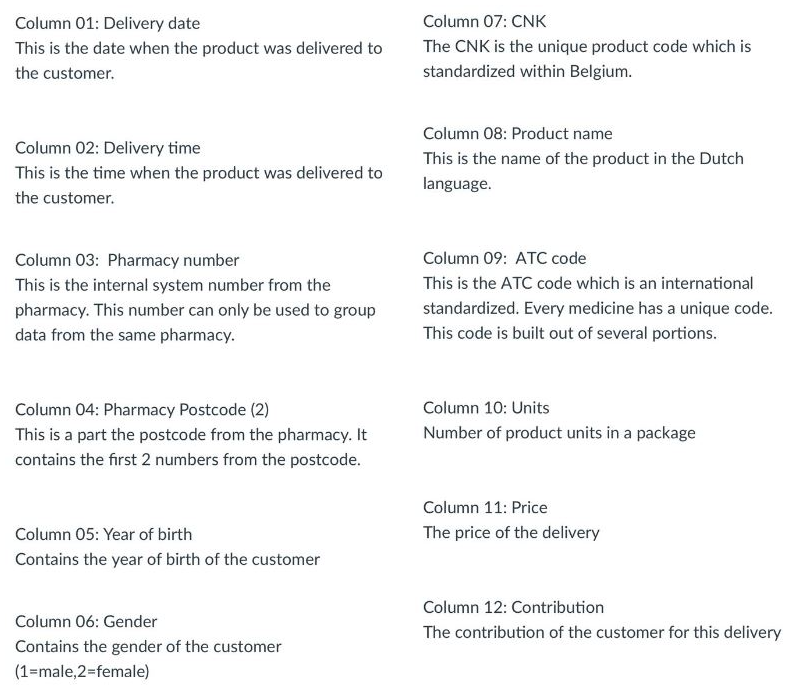

Resources:  
https://www.kite.com/python/answers/how-to-set-column-names-when-importing-a-csv-into-a-pandas-dataframe-in-python  
https://stackoverflow.com/questions/35277075/python-pandas-counting-the-occurrences-of-a-specific-value  
https://stackoverflow.com/questions/27060098/replacing-few-values-in-a-pandas-dataframe-column-with-another-value  
https://thispointer.com/python-pandas-how-to-drop-rows-in-dataframe-by-conditions-on-column-values/
https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e  
https://stackoverflow.com/questions/17978092/combine-date-and-time-columns-using-python-pandas  
https://www.geeksforgeeks.org/convert-the-column-type-from-string-to-datetime-format-in-pandas-dataframe/  
https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/  
https://stackoverflow.com/questions/60214194/error-in-reading-stock-data-datetimeproperties-object-has-no-attribute-week  
https://towardsdatascience.com/an-end-to-end-project-on-time-series-analysis-and-forecasting-with-python-4835e6bf050b 

In [1]:
import pandas as pd
import numpy as np

# Ignore competability warnings
import warnings
warnings.filterwarnings('ignore')

# Option to show all the DataFrame columns
pd.options.display.max_columns = None

In [2]:
header_list = ["Delivery Date", "Delivery Time", "Pharmacy Number", "Pharmacy Postcode",
               "YOB", "Gender", "CNK Code", "Product Name", "ATC Code", "Units", "Price", "Contribution"]
df_pharmacy = pd.read_csv("data_2020/data_2020.csv", names=header_list)

In [3]:
df_pharmacy.shape

(5072146, 12)

In [4]:
df_pharmacy.head(10)

,Delivery Date,Delivery Time,Pharmacy Number,Pharmacy Postcode,YOB,Gender,CNK Code,Product Name,ATC Code,Units,Price,Contribution
0,01/01/2020,00:00,9105972,10,1925,2,5520465,HONORARIUM PER WEEK PER RUSTOORDBEWONER ROB-RVT,,0,3.20,0.00
1,01/01/2020,00:00,9105972,10,1923,2,5520465,HONORARIUM PER WEEK PER RUSTOORDBEWONER ROB-RVT,,0,3.20,0.00
2,01/01/2020,00:00,9105972,10,1924,2,736165,BURINEX COMP 1 X 5 MG,C03CA02,0,0.38,0.08
3,01/01/2020,00:00,9105972,10,1921,2,750695,XARELTO COMP 1 X 15 MG,B01AF01,0,2.38,0.10
4,01/01/2020,00:00,9105972,10,1924,2,750695,XARELTO COMP 1 X 15 MG,B01AF01,0,2.38,0.10
5,01/01/2020,00:00,9105972,10,1921,2,7706310,ESCITALOPRAM TEVA COMP 1 X 10 MG,N06AB10,0,0.17,0.04
6,01/01/2020,00:00,9105972,10,1921,2,7706310,ESCITALOPRAM TEVA COMP 1 X 10 MG,N06AB10,0,0.17,0.04
7,01/01/2020,00:00,9105972,10,1924,2,743732,L THYROXINE CHRISTIAENS COMP 1 X 50 MCG,H03AA01,0,0.02,0.01
8,01/01/2020,00:00,9105972,10,1923,2,743732,L THYROXINE CHRISTIAENS COMP 1 X 50 MCG,H03AA01,0,0.02,0.01
9,01/01/2020,00:00,9105972,10,1923,2,789537,ASAFLOW COMP 1 X 80 MG,B01AC06,0,0.03,0.01


In [5]:
df_pharmacy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5072146 entries, 0 to 5072145
Data columns (total 12 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Delivery Date      object 
 1   Delivery Time      object 
 2   Pharmacy Number    int64  
 3   Pharmacy Postcode  int64  
 4   YOB                int64  
 5   Gender             int64  
 6   CNK Code           int64  
 7   Product Name       object 
 8   ATC Code           object 
 9   Units              int64  
 10  Price              float64
 11  Contribution       float64
dtypes: float64(2), int64(6), object(4)
memory usage: 464.4+ MB


##### Data Wrangling

In [6]:
# Replace first empty placeholders - not all spaces are NaNs
df_pharmacy.replace(' ', '', inplace=True)

In [7]:
# Check for missing values in each column 
df_pharmacy.isnull().sum()

Delivery Date             0
Delivery Time        972059
Pharmacy Number           0
Pharmacy Postcode         0
YOB                       0
Gender                    0
CNK Code                  0
Product Name              0
ATC Code                  0
Units                     0
Price                     0
Contribution              0
dtype: int64

In [8]:
missing_value_formats = ["n.a.", "?", "NA", "n/a", "na", "--", "", 0, 0.00]

df_pharmacy.replace(
    to_replace=missing_value_formats,
    value=np.nan,
    inplace=True
)

In [9]:
# Check for missing values in each column 
df_pharmacy.isnull().sum()

Delivery Date             0
Delivery Time        972059
Pharmacy Number           0
Pharmacy Postcode     37962
YOB                    1580
Gender                12150
CNK Code                  0
Product Name              0
ATC Code             168154
Units                599669
Price                187438
Contribution         848781
dtype: int64

##### Drop additional Gender value == 3

In [10]:
df_pharmacy.Gender.unique()

array([ 2.,  1., nan,  3.])

In [11]:
indexes = df_pharmacy[df_pharmacy['Gender'] == 3].index
df_pharmacy.drop(indexes , inplace=True)

In [12]:
df_pharmacy.Gender.unique()

array([ 2.,  1., nan])

In [ ]:
# Other checks - To be removed

# Orders with 0 units
#df_pharmacy[df_pharmacy.Units == 0].shape[0]

# Orders with 0 units and no contribution
#df_pharmacy[(df_pharmacy.Units == 0) & (df_pharmacy.Contribution == 0.00)].shape[0]

#data = df_pharmacy[(df_pharmacy.Units != 0) & (df_pharmacy.Contribution != 0.00)]
#data.shape

#check = df_pharmacy.shape[0] - data.shape[0]
#check

##### Unique values per column, types and nans

In [13]:
df_pharmacy[150:200]

,Delivery Date,Delivery Time,Pharmacy Number,Pharmacy Postcode,YOB,Gender,CNK Code,Product Name,ATC Code,Units,Price,Contribution
150,01/01/2020,NaN,7056069,42.0,NaN,NaN,5520937,BESCHIKBAARHEIDSHONORARIUM,NaN,NaN,62.96,NaN
151,01/01/2020,NaN,7668522,28.0,NaN,NaN,5520937,BESCHIKBAARHEIDSHONORARIUM,NaN,NaN,62.96,NaN
152,01/01/2020,NaN,7807692,12.0,NaN,NaN,5520937,BESCHIKBAARHEIDSHONORARIUM,NaN,NaN,62.96,NaN
153,01/01/2020,NaN,8112792,60.0,NaN,NaN,5520937,BESCHIKBAARHEIDSHONORARIUM,NaN,NaN,62.96,NaN
154,01/01/2020,03:52,9099141,20.0,2003.0,1.0,1715127,AMOXICLAV SANDOZ 875 MG/125 MG COMP 20,J01CR02,20.0,15.05,6.97
155,01/01/2020,03:52,9099141,20.0,2005.0,1.0,1715127,AMOXICLAV SANDOZ 875 MG/125 MG COMP 20,J01CR02,20.0,15.05,6.97
156,01/01/2020,03:52,9099141,20.0,2002.0,1.0,5520523,WACHTHONORARIUM,NaN,NaN,5.15,NaN
157,01/01/2020,03:52,9099141,20.0,2003.0,1.0,5520523,WACHTHONORARIUM,NaN,NaN,5.15,NaN
158,01/01/2020,06:58,9099141,20.0,2009.0,1.0,2202372,AMOXICILLINE SANDOZ 1000 MG TABL DISP 20,J01CA04,20.0,13.06,5.74
159,01/01/2020,06:58,9099141,20.0,2009.0,1.0,5520523,WACHTHONORARIUM,NaN,NaN,5.15,NaN


In [14]:
df_pharmacy["Pharmacy Postcode"].unique()

array([10., 41., 84., 30., 61., 11., 15., 28., 42., 12., 60., 20., 90.,
       75., 68., 13., 89., 53., 87., 92., 94., 86., 21., 40., 44., 17.,
       39., 14., 55., 50., 26., 25., 93., 48., 70., 22., 99., 29., 88.,
       35., 16., 71., 56., 23., 45., 36., 80., 24., 38., 91., nan, 66.,
       51., 65., 83., 81., 96., 43., 97., 85.])

In [15]:
df_pharmacy.dtypes

Delivery Date         object
Delivery Time         object
Pharmacy Number        int64
Pharmacy Postcode    float64
YOB                  float64
Gender               float64
CNK Code               int64
Product Name          object
ATC Code              object
Units                float64
Price                float64
Contribution         float64
dtype: object

In [16]:
df = df_pharmacy.dropna()
df = df.reset_index(drop=True)
df.shape

(3309068, 12)

In [17]:
df.isnull().sum()

Delivery Date        0
Delivery Time        0
Pharmacy Number      0
Pharmacy Postcode    0
YOB                  0
Gender               0
CNK Code             0
Product Name         0
ATC Code             0
Units                0
Price                0
Contribution         0
dtype: int64

In [18]:
df = df.astype({'Pharmacy Postcode': 'int', 'YOB': 'int', 'Gender': 'int', 'Units': 'int'})
df.dtypes

Delivery Date         object
Delivery Time         object
Pharmacy Number        int64
Pharmacy Postcode      int32
YOB                    int32
Gender                 int32
CNK Code               int64
Product Name          object
ATC Code              object
Units                  int32
Price                float64
Contribution         float64
dtype: object

##### EDA

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

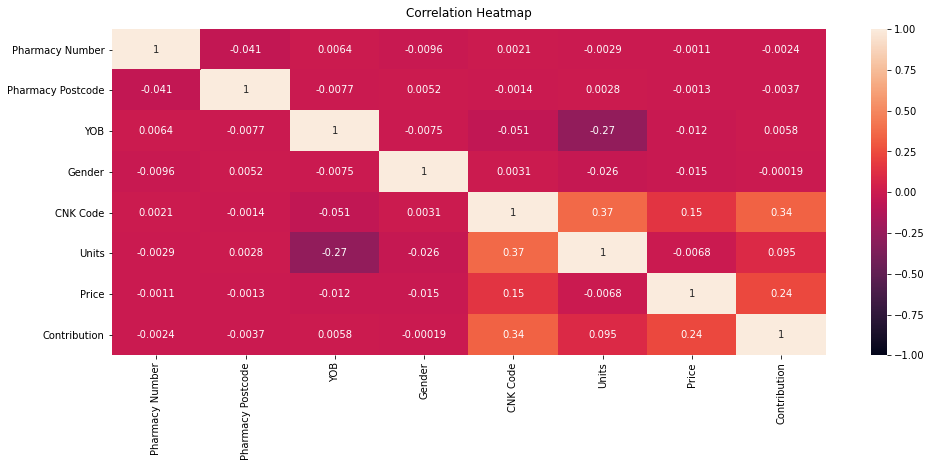

In [65]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True
# to display the correlation values on the heatmap.
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [66]:
# Not all relationships are symetrical, please read the following article
# https://towardsdatascience.com/rip-correlation-introducing-the-predictive-power-score-3d90808b9598
# The Predictive Power Score PPS may give us a better understanding
# of the categorical columns and their relationships

# If you dont have the lib - pip install ppscore
import ppscore as pps

# Create a matrix with all the results
pps_matrix = pps.matrix(df)
pps_matrix

,Delivery Date,Delivery Time,Pharmacy Number,Pharmacy Postcode,YOB,Gender,CNK Code,Product Name,ATC Code,Units,Price,Contribution
Delivery Date,1.000000,0.000531,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.002142
Delivery Time,0.000000,1.000000,0.232195,0.038308,0.000198,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Pharmacy Number,0.000000,0.000000,1.000000,0.009950,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Pharmacy Postcode,0.000000,0.000000,0.998296,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
YOB,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.070448,0.100616,0.127919,0.031963,0.019718,0.000000
Gender,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.090678,0.092824,0.127655,0.002828,0.081587,0.089269
CNK Code,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.857167,0.544826,0.194922,0.622539,0.462356
Product Name,0.000000,0.000476,0.001504,0.000000,0.003673,0.0,0.860582,1.000000,0.309781,0.057202,0.669192,0.527784
ATC Code,0.004144,0.000000,0.002247,0.000000,0.007923,0.0,0.896220,0.880725,1.000000,0.138248,0.724539,0.581105
Units,0.000000,0.000000,0.000000,0.000000,0.043735,0.0,0.866590,0.848453,0.644183,1.000000,0.669678,0.487999


##### Time Series Data 

In [20]:
df[10333:10339]

,Delivery Date,Delivery Time,Pharmacy Number,Pharmacy Postcode,YOB,Gender,CNK Code,Product Name,ATC Code,Units,Price,Contribution
10333,01/02/2020,14:43,7084071,20,1937,2,2557213,PANTOMED 20 MG TABL 100,A02BC02,100,17.65,4.40
10334,01/02/2020,14:43,7084071,20,1939,2,3181757,"L THYROXINE CHRISTIAENS COMP 112X0,075MG",H03AA01,112,8.60,1.35
10335,01/02/2020,14:43,4065450,20,1954,1,3154549,"ALGOTRA COMP OMHULDE 30 X 325MG/37,5MG",N02AJ13,30,8.22,2.46
10336,01/02/2020,14:43,4065450,20,1950,1,3154549,"ALGOTRA COMP OMHULDE 30 X 325MG/37,5MG",N02AJ13,30,8.22,2.46
10337,01/02/2020,14:43,7668522,28,1955,1,1677798,TRAMADOL EG TABL 60 X 50 MG,N02AX02,60,10.25,1.20
10338,01/02/2020,14:43,7668522,28,1955,1,1677798,TRAMADOL EG TABL 60 X 50 MG,N02AX02,60,10.31,1.20


In [21]:
df['delivery_date']= pd.to_datetime(df['Delivery Date'])

In [22]:
df.dtypes

Delivery Date                object
Delivery Time                object
Pharmacy Number               int64
Pharmacy Postcode             int32
YOB                           int32
Gender                        int32
CNK Code                      int64
Product Name                 object
ATC Code                     object
Units                         int32
Price                       float64
Contribution                float64
delivery_date        datetime64[ns]
dtype: object

In [23]:
df[10333:10339]

,Delivery Date,Delivery Time,Pharmacy Number,Pharmacy Postcode,YOB,Gender,CNK Code,Product Name,ATC Code,Units,Price,Contribution,delivery_date
10333,01/02/2020,14:43,7084071,20,1937,2,2557213,PANTOMED 20 MG TABL 100,A02BC02,100,17.65,4.40,2020-01-02
10334,01/02/2020,14:43,7084071,20,1939,2,3181757,"L THYROXINE CHRISTIAENS COMP 112X0,075MG",H03AA01,112,8.60,1.35,2020-01-02
10335,01/02/2020,14:43,4065450,20,1954,1,3154549,"ALGOTRA COMP OMHULDE 30 X 325MG/37,5MG",N02AJ13,30,8.22,2.46,2020-01-02
10336,01/02/2020,14:43,4065450,20,1950,1,3154549,"ALGOTRA COMP OMHULDE 30 X 325MG/37,5MG",N02AJ13,30,8.22,2.46,2020-01-02
10337,01/02/2020,14:43,7668522,28,1955,1,1677798,TRAMADOL EG TABL 60 X 50 MG,N02AX02,60,10.25,1.20,2020-01-02
10338,01/02/2020,14:43,7668522,28,1955,1,1677798,TRAMADOL EG TABL 60 X 50 MG,N02AX02,60,10.31,1.20,2020-01-02


In [24]:
df['delivery_date_time'] = pd.to_datetime(df['Delivery Date'] + ' ' + df['Delivery Time'])

In [25]:
df[10333:10339]

,Delivery Date,Delivery Time,Pharmacy Number,Pharmacy Postcode,YOB,Gender,CNK Code,Product Name,ATC Code,Units,Price,Contribution,delivery_date,delivery_date_time
10333,01/02/2020,14:43,7084071,20,1937,2,2557213,PANTOMED 20 MG TABL 100,A02BC02,100,17.65,4.40,2020-01-02,2020-01-02 14:43:00
10334,01/02/2020,14:43,7084071,20,1939,2,3181757,"L THYROXINE CHRISTIAENS COMP 112X0,075MG",H03AA01,112,8.60,1.35,2020-01-02,2020-01-02 14:43:00
10335,01/02/2020,14:43,4065450,20,1954,1,3154549,"ALGOTRA COMP OMHULDE 30 X 325MG/37,5MG",N02AJ13,30,8.22,2.46,2020-01-02,2020-01-02 14:43:00
10336,01/02/2020,14:43,4065450,20,1950,1,3154549,"ALGOTRA COMP OMHULDE 30 X 325MG/37,5MG",N02AJ13,30,8.22,2.46,2020-01-02,2020-01-02 14:43:00
10337,01/02/2020,14:43,7668522,28,1955,1,1677798,TRAMADOL EG TABL 60 X 50 MG,N02AX02,60,10.25,1.20,2020-01-02,2020-01-02 14:43:00
10338,01/02/2020,14:43,7668522,28,1955,1,1677798,TRAMADOL EG TABL 60 X 50 MG,N02AX02,60,10.31,1.20,2020-01-02,2020-01-02 14:43:00


In [26]:
df_time = df.set_index('delivery_date_time')
df_time.head(5)

,Delivery Date,Delivery Time,Pharmacy Number,Pharmacy Postcode,YOB,Gender,CNK Code,Product Name,ATC Code,Units,Price,Contribution,delivery_date
delivery_date_time,,,,,,,,,,,,,
2020-01-01,01/01/2020,00:00,9105972,10,1945,2,2218279,DUROGESIC PL EMP 10X 25MCG/HEURE/UUR,N02AB03,10,32.99,5.22,2020-01-01
2020-01-01,01/01/2020,00:00,9123051,61,1955,2,2622264,AMOCLANEEG 875MG/125MG FILMOMH TABL 20,J01CR02,20,15.12,7.03,2020-01-01
2020-01-01,01/01/2020,00:00,9123051,61,1957,2,2622264,AMOCLANEEG 875MG/125MG FILMOMH TABL 20,J01CR02,20,15.12,7.03,2020-01-01
2020-01-01,01/01/2020,00:00,9123051,61,1956,2,867556,BRUFEN FORTE 600 MG FILMOMH TABL 30 X 600 MG,M01AE01,30,6.41,0.68,2020-01-01
2020-01-01,01/01/2020,00:00,9123051,61,1959,2,867556,BRUFEN FORTE 600 MG FILMOMH TABL 30 X 600 MG,M01AE01,30,6.41,0.68,2020-01-01


In [27]:
df_time.index

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 00:00:00',
               '2020-01-01 00:00:00', '2020-01-01 00:00:00',
               '2020-01-01 00:00:00', '2020-01-01 00:00:00',
               '2020-01-01 00:00:00', '2020-01-01 00:00:00',
               '2020-01-01 00:00:00', '2020-01-01 00:00:00',
               ...
               '2020-07-31 23:19:00', '2020-07-31 23:19:00',
               '2020-07-31 23:19:00', '2020-07-31 23:19:00',
               '2020-07-31 23:19:00', '2020-07-31 23:19:00',
               '2020-07-31 23:19:00', '2020-07-31 23:19:00',
               '2020-07-31 23:19:00', '2020-07-31 23:19:00'],
              dtype='datetime64[ns]', name='delivery_date_time', length=3309068, freq=None)

In [28]:
# Add columns with year, month, and weekday name
df_time['Year'] = df_time.index.year
df_time['Month'] = df_time.index.month
df_time['Weekday Name'] = df_time['delivery_date'].dt.day_name()
# Display a random sampling of 5 rows
df_time.sample(5, random_state=0)

,Delivery Date,Delivery Time,Pharmacy Number,Pharmacy Postcode,YOB,Gender,CNK Code,Product Name,ATC Code,Units,Price,Contribution,delivery_date,Year,Month,Weekday Name
delivery_date_time,,,,,,,,,,,,,,,,
2020-05-25 10:32:00,05/25/2020,10:32,7726050,28,1942,1,16832,ALLOPURINOL EG COMP 90 X 300 MG,M04AA01,90,10.80,2.04,2020-05-25,2020,5,Monday
2020-04-08 17:56:00,04/08/2020,17:56,7056069,42,1974,2,119172,"MAXIDEX COLLYRE 5ML 0,1%",S01BA01,1,6.71,0.39,2020-04-08,2020,4,Wednesday
2020-01-17 00:00:00,01/17/2020,00:00,7666512,29,1958,1,117572,LASIX COMP 50 X 40 MG,C03CA01,50,9.74,3.00,2020-01-17,2020,1,Friday
2020-02-26 13:57:00,02/26/2020,13:57,7840239,30,2019,2,2322436,ROTATEQ 1 TUBE 1 DOSE = 2 ML,J07BH02,1,53.37,12.46,2020-02-26,2020,2,Wednesday
2020-02-10 00:00:00,02/10/2020,00:00,7993260,35,1936,1,1092857,"LEDERTREXATE COMP 30X2,5MG",L04AX03,30,8.06,0.98,2020-02-10,2020,2,Monday


In [82]:
# Now you can slice data based on time periods
df_time.loc['2020-01-05':'2020-02-05']

,Delivery Date,Delivery Time,Pharmacy Number,Pharmacy Postcode,YOB,Gender,CNK Code,Product Name,ATC Code,Units,Price,Contribution,delivery_date,Year,Month,Weekday Name
delivery_date_time,,,,,,,,,,,,,,,,
2020-02-01 09:18:00,02/01/2020,09:18,7612332,80,1956,2,1132885,IBUPROFEN EG 400 MG FILMOMH TABL 30 X 400 MG,M01AE01,30,6.21,0.28,2020-02-01,2020,2,Saturday
2020-02-01 10:56:00,02/01/2020,10:56,7612332,80,1961,1,1184027,ZESTRIL 20 COMP 56X20MG,C09AA03,56,19.66,7.62,2020-02-01,2020,2,Saturday
2020-02-01 10:56:00,02/01/2020,10:56,7612332,80,1959,1,2695864,ZANIDIP COMP 98 X 10 MG,C08CA13,98,24.75,10.07,2020-02-01,2020,2,Saturday
2020-02-01 11:04:00,02/01/2020,11:04,7612332,80,1946,1,2555159,PANTOPRAZOLE EG 20MG MAAGSAPRESIST.TABL BLIST 28,A02BC02,28,8.65,2.62,2020-02-01,2020,2,Saturday
2020-01-05 00:00:00,01/05/2020,00:00,8101971,10,1936,2,113399,FURADANTINE MC CAPS 50 X 100 MG,J01XE01,50,10.33,3.90,2020-01-05,2020,1,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-07 16:53:00,01/07/2020,16:53,7695600,43,1935,2,3049905,INUVAIR 100/6MCG NEXTHALER DOSES 1X120,R03AK08,1,46.38,7.09,2020-01-07,2020,1,Tuesday
2020-01-07 17:23:00,01/07/2020,17:23,7612332,80,1980,2,40428,ETUMINE BLISTER COMP 30 X 40MG,N05AH06,30,8.13,1.22,2020-01-07,2020,1,Tuesday
2020-01-07 17:10:00,01/07/2020,17:10,7695600,43,1947,2,3000718,"MONOPROST 0,005% COLLYRE 90 X 0,2 ML",S01EE01,90,29.15,7.85,2020-01-07,2020,1,Tuesday


In [83]:
# Or slice the entire month rows
df_time.loc['2020-03']

,Delivery Date,Delivery Time,Pharmacy Number,Pharmacy Postcode,YOB,Gender,CNK Code,Product Name,ATC Code,Units,Price,Contribution,delivery_date,Year,Month,Weekday Name
delivery_date_time,,,,,,,,,,,,,,,,
2020-03-01 09:52:00,03/01/2020,09:52,7612332,80,1995,2,2666352,MONTELUKAST SANDOZ 10 MG FILMOMH TABL 28 X 10 MG,R03DC03,28,19.59,5.05,2020-03-01,2020,3,Sunday
2020-03-01 09:54:00,03/01/2020,09:54,7612332,80,1941,2,2990760,ATORSTATINEG 20 MG FILMOMH TABL 100,C10AA05,100,27.01,7.42,2020-03-01,2020,3,Sunday
2020-03-01 09:59:00,03/01/2020,09:59,7612332,80,1966,1,2351740,AZITHROMYCINE 500 MG SANDOZ TABL OMHULDE 6X50...,J01FA10,6,14.48,6.70,2020-03-01,2020,3,Sunday
2020-03-01 09:06:00,03/01/2020,09:06,7612332,80,1935,1,1715127,AMOXICLAV SANDOZ 875 MG/125 MG COMP 20,J01CR02,20,15.05,6.97,2020-03-01,2020,3,Sunday
2020-03-01 09:06:00,03/01/2020,09:06,7612332,80,1937,1,1715127,AMOXICLAV SANDOZ 875 MG/125 MG COMP 20,J01CR02,20,15.05,6.97,2020-03-01,2020,3,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-07 18:47:00,03/07/2020,18:47,7695600,43,1950,2,891416,UTROGESTAN CAPS ORAL 90 X 100 MG,G03DA04,90,12.22,2.76,2020-03-07,2020,3,Saturday
2020-03-07 18:47:00,03/07/2020,18:47,7695600,43,1949,2,891416,UTROGESTAN CAPS ORAL 90 X 100 MG,G03DA04,90,12.22,2.76,2020-03-07,2020,3,Saturday
2020-03-07 18:47:00,03/07/2020,18:47,7695600,43,1953,2,891416,UTROGESTAN CAPS ORAL 90 X 100 MG,G03DA04,90,12.22,2.76,2020-03-07,2020,3,Saturday


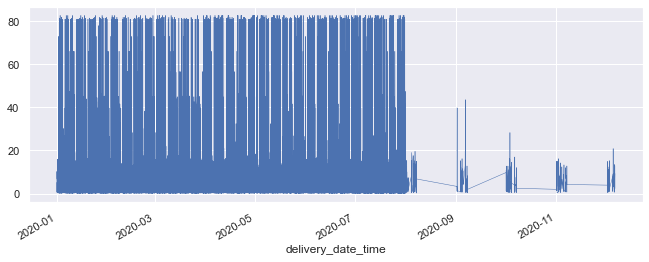

In [84]:
import matplotlib.pyplot as plt
# Display figures inline in Jupyter notebook
import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})

df_time['Contribution'].plot(linewidth=0.5);

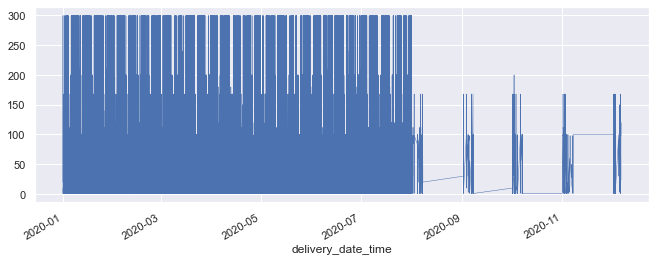

In [87]:
df_time['Units'].plot(linewidth=0.5);

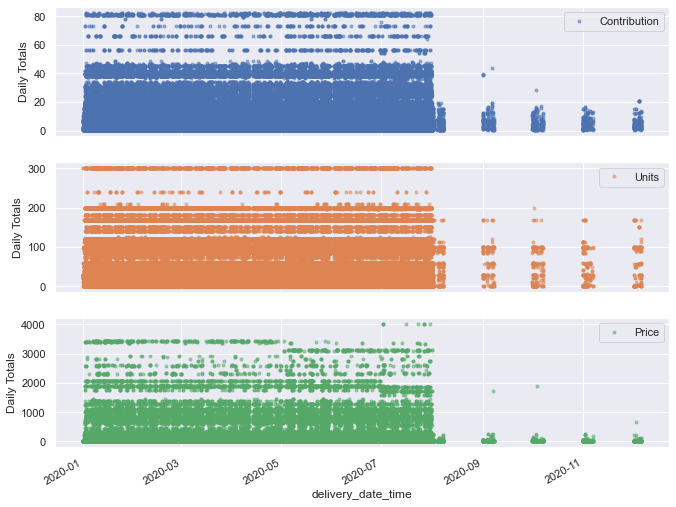

In [88]:
cols_plot = ['Contribution', 'Units', 'Price']
axes = df_time[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily Totals')

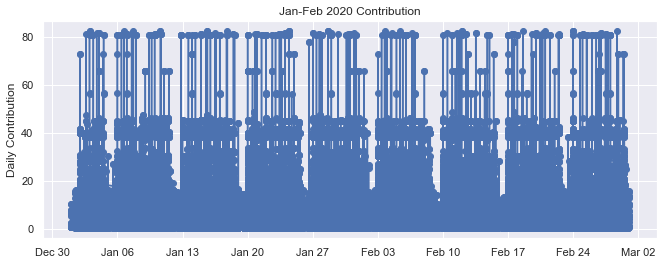

In [90]:
import matplotlib.dates as mdates

fig, ax = plt.subplots()
ax.plot(df_time.loc['2020-01':'2020-02', 'Contribution'], marker='o', linestyle='-')
ax.set_ylabel('Daily Contribution')
ax.set_title('Jan-Feb 2020 Contribution')

# Set x-axis major ticks to weekly interval, on Mondays
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
# Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));

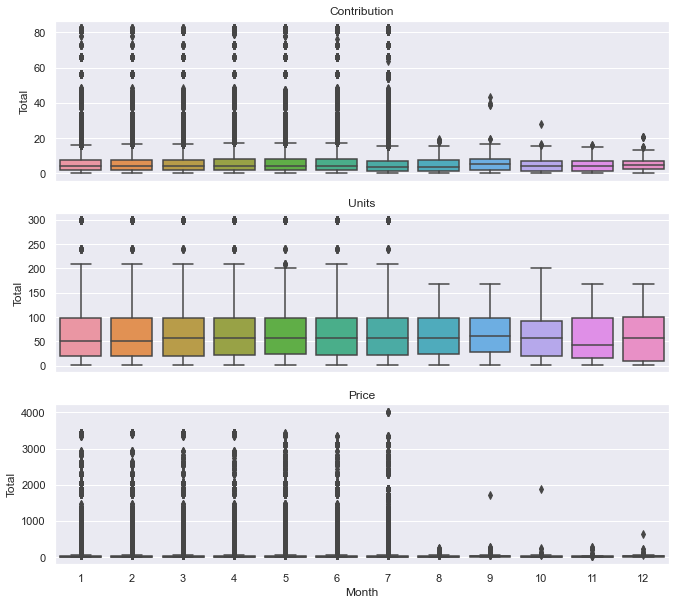

In [92]:
fig, axes = plt.subplots(3, 1, figsize=(11, 10), sharex=True)
for name, ax in zip(['Contribution', 'Units', 'Price'], axes):
    sns.boxplot(data=df_time, x='Month', y=name, ax=ax)
    ax.set_ylabel('Total')
    ax.set_title(name)
    # Remove the automatic x-axis label from all but the bottom subplot
    if ax != axes[-1]:
        ax.set_xlabel('')

In [36]:
# Here more visualizations from https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/
# Please if you want to re-create the visualizations in the project folder use:
# https://www.jmp.com/en_gb/home.html
# Software for data analisis from SAS capable to deal with big amounts of data

In [31]:
df_time.head()

,Delivery Date,Delivery Time,Pharmacy Number,Pharmacy Postcode,YOB,Gender,CNK Code,Product Name,ATC Code,Units,Price,Contribution,delivery_date,Year,Month,Weekday Name
delivery_date_time,,,,,,,,,,,,,,,,
2020-01-01,01/01/2020,00:00,9105972,10,1945,2,2218279,DUROGESIC PL EMP 10X 25MCG/HEURE/UUR,N02AB03,10,32.99,5.22,2020-01-01,2020,1,Wednesday
2020-01-01,01/01/2020,00:00,9123051,61,1955,2,2622264,AMOCLANEEG 875MG/125MG FILMOMH TABL 20,J01CR02,20,15.12,7.03,2020-01-01,2020,1,Wednesday
2020-01-01,01/01/2020,00:00,9123051,61,1957,2,2622264,AMOCLANEEG 875MG/125MG FILMOMH TABL 20,J01CR02,20,15.12,7.03,2020-01-01,2020,1,Wednesday
2020-01-01,01/01/2020,00:00,9123051,61,1956,2,867556,BRUFEN FORTE 600 MG FILMOMH TABL 30 X 600 MG,M01AE01,30,6.41,0.68,2020-01-01,2020,1,Wednesday
2020-01-01,01/01/2020,00:00,9123051,61,1959,2,867556,BRUFEN FORTE 600 MG FILMOMH TABL 30 X 600 MG,M01AE01,30,6.41,0.68,2020-01-01,2020,1,Wednesday


In [29]:
df_time.shape

(3309068, 16)

In [38]:
group_by_date = df_time.groupby('delivery_date')['Contribution'].sum()
print(group_by_date)

delivery_date
2020-01-01     1547.21
2020-01-02    73568.54
2020-01-03    93811.55
2020-01-04    40186.05
2020-01-05     2119.99
                ...   
2020-11-07       41.63
2020-12-02      177.73
2020-12-03      105.68
2020-12-05      329.84
2020-12-06      197.68
Name: Contribution, Length: 242, dtype: float64


In [39]:
group_by_price = df_time.groupby('delivery_date')['Price'].sum()
print(group_by_price)

delivery_date
2020-01-01      5381.65
2020-01-02    376623.48
2020-01-03    440875.85
2020-01-04    206925.18
2020-01-05      6499.61
                ...    
2020-11-07       352.88
2020-12-02       881.09
2020-12-03      1305.32
2020-12-05      1612.12
2020-12-06       770.85
Name: Price, Length: 242, dtype: float64


In [40]:
type(group_by_price)

pandas.core.series.Series

In [41]:
df_test = group_by_price.to_frame().reset_index()

In [44]:
df_test.shape

(242, 2)

In [45]:
df_test.head()

,delivery_date,Price
0,2020-01-01,5381.65
1,2020-01-02,376623.48
2,2020-01-03,440875.85
3,2020-01-04,206925.18
4,2020-01-05,6499.61


In [30]:
# Contribution per pharmacy
group_class = df_time.groupby('Pharmacy Number')['Contribution'].sum()
print(group_class)

Pharmacy Number
3790968      44711.57
4003923        297.72
4038423      97057.11
4065450     132936.25
4306971      83310.01
              ...    
12403926    114463.97
13876641    164522.58
14017410     46324.47
18932010     21789.00
30522741     83020.48
Name: Contribution, Length: 258, dtype: float64


In [32]:
# Contribution per pharmacy
group_class = df_time.groupby('Pharmacy Postcode')['Contribution'].sum()
print(group_class)

Pharmacy Postcode
10    2.264715e+06
11    2.655302e+05
12    1.723234e+05
13    1.860746e+05
14    2.178520e+05
15    1.942671e+05
16    1.933811e+05
17    7.862356e+04
20    3.365417e+06
21    3.240315e+05
22    8.356629e+05
23    3.620533e+05
24    2.633554e+05
25    6.335779e+04
26    2.741504e+05
28    4.362255e+05
29    3.206213e+05
30    1.329792e+06
35    1.533233e+05
36    1.768392e+05
38    2.934660e+05
39    2.987792e+05
40    8.013931e+05
41    1.348908e+05
42    9.430006e+04
43    1.082642e+04
44    5.440064e+04
45    2.251044e+05
48    4.669108e+05
50    4.693072e+05
51    6.478158e+04
53    5.272083e+04
55    1.366398e+05
56    1.639595e+05
60    1.911768e+05
61    9.861874e+04
65    1.526182e+05
66    1.332580e+05
68    4.013000e+02
70    1.492732e+05
71    1.822786e+05
75    9.648078e+04
80    4.010323e+05
81    2.413576e+04
83    3.067345e+04
84    1.985886e+05
85    2.970761e+04
86    9.885555e+04
87    8.552189e+04
88    2.025448e+05
89    8.495005e+04
90    9.10094

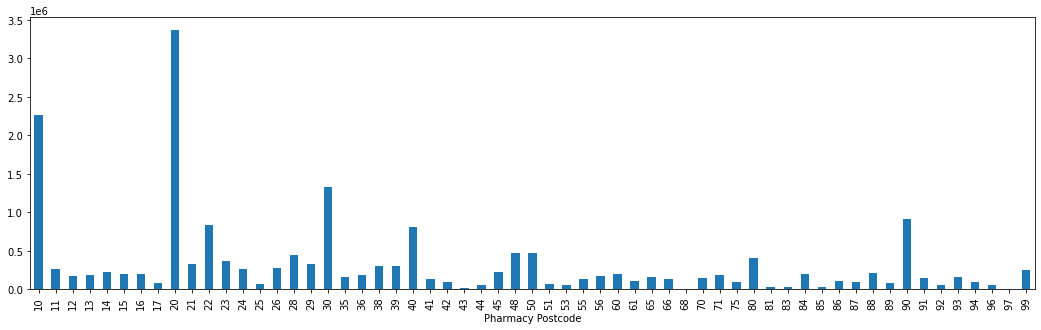

In [34]:
group_class.plot.bar(figsize=(18,5))

plt.show()

In [37]:
# Export the data to csv
# df_time.to_csv('df_time.csv')

In [96]:
gk = df_time.groupby('Pharmacy Number') 

In [100]:
type(gk)

pandas.core.groupby.generic.DataFrameGroupBy

In [98]:
gk.first()

,Delivery Date,Delivery Time,Pharmacy Postcode,YOB,Gender,CNK Code,Product Name,ATC Code,Units,Price,Contribution,delivery_date,Year,Month,Weekday Name
Pharmacy Number,,,,,,,,,,,,,,,
3790968,01/02/2020,10:59,21,2019,1,2663532,"ROTARIX SUSP BUV 1,5 ML",J07BH01,1,75.77,12.83,2020-01-02,2020,1,Thursday
4003923,03/17/2020,19:27,10,2016,1,2622314,"AMOCLANEEG 250MG/62,5MG/5ML DRINKB.SUSP 100ML",J01CR02,1,8.79,2.69,2020-03-17,2020,3,Tuesday
4038423,01/02/2020,08:57,20,1966,2,2582435,ZANICOMBO 10 MG/10 MG FILMOMH TABL 98,C09BB02,98,30.42,12.21,2020-01-02,2020,1,Thursday
4065450,01/02/2020,09:50,20,1966,2,3926664,"ALPHARIX TETRA OPL INJ VOORGEV.SPUIT 0,5 ML ...",J07BB02,1,13.97,7.38,2020-01-02,2020,1,Thursday
4306971,01/02/2020,09:51,22,1954,1,3641040,ROSUVASTATINE MYLAN 10MG FILMOMH TABL 98,C10AA07,98,23.98,6.59,2020-01-02,2020,1,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12403926,01/03/2020,00:00,11,1922,1,119065,MARCOUMAR COMP 25 X 3 MG,B01AA04,25,6.36,0.56,2020-01-03,2020,1,Friday
13876641,01/02/2020,09:37,39,1971,1,1499185,VALTRAN GUTT BUV 1 X 60 ML,N02AX01,1,14.58,3.37,2020-01-02,2020,1,Thursday
14017410,01/02/2020,09:39,10,1947,1,2622264,AMOCLANEEG 875MG/125MG FILMOMH TABL 20,J01CR02,20,15.12,7.03,2020-01-02,2020,1,Thursday


### Forecasting

In [46]:
df_test.shape

(242, 2)

In [47]:
df_test.head()

,delivery_date,Price
0,2020-01-01,5381.65
1,2020-01-02,376623.48
2,2020-01-03,440875.85
3,2020-01-04,206925.18
4,2020-01-05,6499.61


In [48]:
df_test.dtypes

delivery_date    datetime64[ns]
Price                   float64
dtype: object

In [50]:
df_forecast = df_test.set_index('delivery_date')
df_forecast.index

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10',
               ...
               '2020-11-02', '2020-11-03', '2020-11-04', '2020-11-05',
               '2020-11-06', '2020-11-07', '2020-12-02', '2020-12-03',
               '2020-12-05', '2020-12-06'],
              dtype='datetime64[ns]', name='delivery_date', length=242, freq=None)

In [51]:
y = df_forecast['Price'].resample('MS').mean()

In [52]:
y

delivery_date
2020-01-01    585833.325484
2020-02-01    389790.941724
2020-03-01    402866.722581
2020-04-01    353722.499000
2020-05-01    569010.294839
2020-06-01    408099.771667
2020-07-01    395956.810968
2020-08-01      1331.538333
2020-09-01      1155.503333
2020-10-01      1165.675000
2020-11-01       641.664286
2020-12-01      1142.345000
Freq: MS, Name: Price, dtype: float64

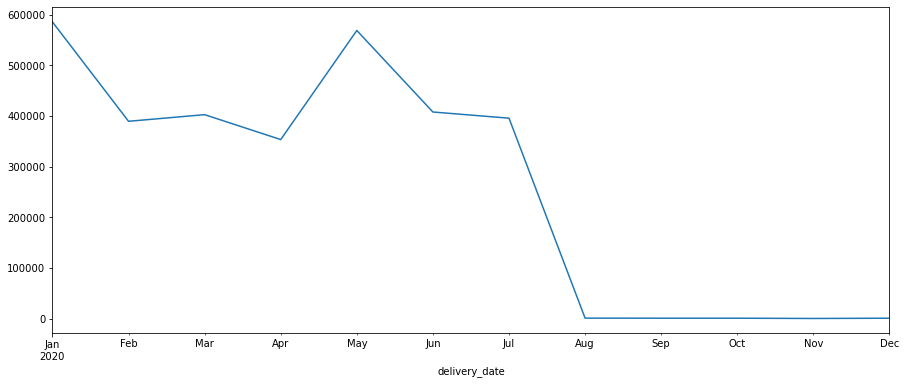

In [53]:
y.plot(figsize=(15, 6))
plt.show()

In [56]:
# This will work is you use the big data set because it needs more than 24 months

from pylab import rcParams
import statsmodels.api as sm

rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

ValueError: x must have 2 complete cycles requires 24 observations. x only has 12 observation(s)

#### ARIMA = Autoregressive Integrated Moving Average

In [58]:
import itertools

p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [63]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:311.8750677797765
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:4.0
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:2.0
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:4.0
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:4.0
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:6.0
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:4.0
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:6.0
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:278.2665274372251
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:6.0
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:4.0
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:6.0
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:6.0
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:8.0

C:\Users\Angel\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)



ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:6.0
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:8.0
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:269.00096984877376
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:4.0
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:2.0
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:4.0
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:4.0
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:6.0
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:4.0
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:6.0
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:245.0772324273814
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:6.0
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:4.0


C:\Users\Angel\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\Angel\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:6.0
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:6.0
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:8.0
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:6.0
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:8.0
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:295.2718209029121
ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:6.0
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:4.0
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:6.0
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:6.0
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:8.0


C:\Users\Angel\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\Angel\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\Angel\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:6.0
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:8.0
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:271.2773812614031
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:8.0
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:6.0
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:8.0
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:8.0
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:10.0
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:8.0
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:10.0
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:270.71409197432547
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:6.0


C:\Users\Angel\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\Angel\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\Angel\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\Angel\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:4.0
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:6.0
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:6.0
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:8.0
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:6.0
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:8.0
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:240.02370245680052
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:8.0
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:6.0
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:8.0
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:8.0
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:10.0
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:8.0
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:10.0


In [64]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(0, 0, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6688      0.165     -4.043      0.000      -0.993      -0.345
ma.L1          1.5097      0.764      1.976      0.048       0.012       3.007
sigma2      2.002e+10   1.72e-11   1.16e+21      0.000       2e+10       2e+10


TypeError: invalid type promotion

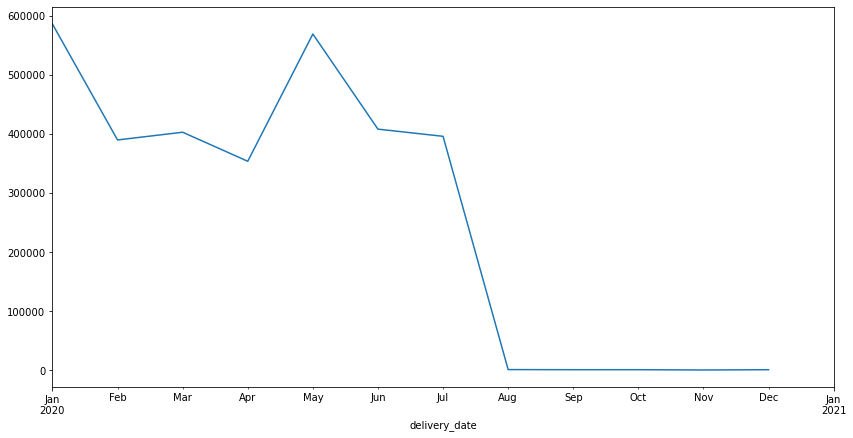

In [66]:
pred = results.get_prediction(start=pd.to_datetime('2021-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2020':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
plt.legend()
plt.show()

# Adding data

In [68]:
header_list = ["Delivery Date", "Delivery Time", "Pharmacy Number", "Pharmacy Postcode",
               "YOB", "Gender", "CNK Code", "Product Name", "ATC Code", "Units", "Price", "Contribution"]
df_pharmacy_all = pd.read_csv("data_all/ds.csv", names=header_list)

In [69]:
df_pharmacy_all.shape

(22705348, 12)

In [70]:
df_pharmacy_all.head(10)

,Delivery Date,Delivery Time,Pharmacy Number,Pharmacy Postcode,YOB,Gender,CNK Code,Product Name,ATC Code,Units,Price,Contribution
0,01/01/2017,00:00,7341765,21,1923,1,1715119,AMOXICLAV SANDOZ 500MG/125 MG COMP 30,J01CR02,30,14.81,3.47
1,01/01/2017,00:00,7341765,21,1923,1,5520523,WACHTHONORARIUM,,0,4.90,0.00
2,01/01/2017,00:00,7341765,21,1925,1,1799931,"ZALDIAR 37,5 MG/325 MG FILMOMH TABL 20",N02AJ13,20,9.26,3.62
3,01/01/2017,00:00,8272695,16,1930,2,1719400,VASEXTEN CAPS BLIST 28 X 10 MG,C08CA12,28,19.22,4.98
4,01/01/2017,00:00,8272695,16,1933,2,5520523,WACHTHONORARIUM,,0,4.90,0.00
5,01/01/2017,00:00,9111423,10,1931,1,1750132,AACIDEXAM 5MG/ML OPL INJ FL INJ 1 X 1ML,H02AB02,1,6.15,0.39
6,01/01/2017,00:00,9111423,10,1935,1,1750132,AACIDEXAM 5MG/ML OPL INJ FL INJ 1 X 1ML,H02AB02,1,6.15,0.39
7,01/01/2017,00:00,8272695,16,1937,2,1715127,AMOXICLAV SANDOZ 875 MG/125 MG COMP 20,J01CR02,20,15.18,3.58
8,01/01/2017,00:00,8272695,16,1937,2,5520523,WACHTHONORARIUM,,0,4.90,0.00
9,01/01/2017,00:00,7341765,21,1939,1,5520523,WACHTHONORARIUM,,0,4.90,0.00


In [71]:
df_pharmacy_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22705348 entries, 0 to 22705347
Data columns (total 12 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Delivery Date      object 
 1   Delivery Time      object 
 2   Pharmacy Number    int64  
 3   Pharmacy Postcode  int64  
 4   YOB                int64  
 5   Gender             int64  
 6   CNK Code           int64  
 7   Product Name       object 
 8   ATC Code           object 
 9   Units              int64  
 10  Price              float64
 11  Contribution       float64
dtypes: float64(2), int64(6), object(4)
memory usage: 2.0+ GB


In [74]:
# Replace first empty placeholders - not all spaces are NaNs
df_pharmacy_all.replace(' ', '', inplace=True)
# Check for missing values in each column 
df_pharmacy_all.isnull().sum()

Delivery Date              0
Delivery Time        4941181
Pharmacy Number            0
Pharmacy Postcode          0
YOB                        0
Gender                     0
CNK Code                   0
Product Name               0
ATC Code                   0
Units                      0
Price                      0
Contribution               0
dtype: int64

In [75]:
missing_value_formats = ["n.a.", "?", "NA", "n/a", "na", "--", "", 0, 0.00]

df_pharmacy_all.replace(
    to_replace=missing_value_formats,
    value=np.nan,
    inplace=True
)
# Check for missing values in each column 
df_pharmacy_all.isnull().sum()

Delivery Date              0
Delivery Time        4941181
Pharmacy Number            0
Pharmacy Postcode     157072
YOB                     5219
Gender                 78181
CNK Code                   0
Product Name               0
ATC Code              893665
Units                3592232
Price                 904353
Contribution         4399804
dtype: int64

In [77]:
df = df_pharmacy_all.dropna()
df = df.reset_index(drop=True)
df.isnull().sum()

Delivery Date        0
Delivery Time        0
Pharmacy Number      0
Pharmacy Postcode    0
YOB                  0
Gender               0
CNK Code             0
Product Name         0
ATC Code             0
Units                0
Price                0
Contribution         0
dtype: int64

In [78]:
df.shape

(13565923, 12)

In [79]:
df.dtypes

Delivery Date         object
Delivery Time         object
Pharmacy Number        int64
Pharmacy Postcode    float64
YOB                  float64
Gender               float64
CNK Code               int64
Product Name          object
ATC Code              object
Units                float64
Price                float64
Contribution         float64
dtype: object

In [80]:
df = df.astype({'Pharmacy Postcode': 'int', 'YOB': 'int', 'Gender': 'int', 'Units': 'int'})
df.dtypes

Delivery Date         object
Delivery Time         object
Pharmacy Number        int64
Pharmacy Postcode      int32
YOB                    int32
Gender                 int32
CNK Code               int64
Product Name          object
ATC Code              object
Units                  int32
Price                float64
Contribution         float64
dtype: object

In [81]:
df['delivery_date']= pd.to_datetime(df['Delivery Date'])
df['delivery_date_time'] = pd.to_datetime(df['Delivery Date'] + ' ' + df['Delivery Time'])
df.head()

,Delivery Date,Delivery Time,Pharmacy Number,Pharmacy Postcode,YOB,Gender,CNK Code,Product Name,ATC Code,Units,Price,Contribution,delivery_date,delivery_date_time
0,01/01/2017,00:00,7341765,21,1923,1,1715119,AMOXICLAV SANDOZ 500MG/125 MG COMP 30,J01CR02,30,14.81,3.47,2017-01-01,2017-01-01
1,01/01/2017,00:00,7341765,21,1925,1,1799931,"ZALDIAR 37,5 MG/325 MG FILMOMH TABL 20",N02AJ13,20,9.26,3.62,2017-01-01,2017-01-01
2,01/01/2017,00:00,8272695,16,1930,2,1719400,VASEXTEN CAPS BLIST 28 X 10 MG,C08CA12,28,19.22,4.98,2017-01-01,2017-01-01
3,01/01/2017,00:00,9111423,10,1931,1,1750132,AACIDEXAM 5MG/ML OPL INJ FL INJ 1 X 1ML,H02AB02,1,6.15,0.39,2017-01-01,2017-01-01
4,01/01/2017,00:00,9111423,10,1935,1,1750132,AACIDEXAM 5MG/ML OPL INJ FL INJ 1 X 1ML,H02AB02,1,6.15,0.39,2017-01-01,2017-01-01


In [82]:
group_by_price = df.groupby('delivery_date')['Price'].sum()
print(group_by_price)

delivery_date
2017-01-01      5255.78
2017-01-02    290603.19
2017-01-03    433230.18
2017-01-04    402280.87
2017-01-05    432374.46
                ...    
2019-12-27    383708.80
2019-12-28    170061.09
2019-12-29      9705.90
2019-12-30    427991.49
2019-12-31    296502.03
Name: Price, Length: 1095, dtype: float64


In [83]:
df_test = group_by_price.to_frame().reset_index()
df_test.shape

(1095, 2)

In [84]:
df_test.dtypes

delivery_date    datetime64[ns]
Price                   float64
dtype: object

In [85]:
df_test.head()

,delivery_date,Price
0,2017-01-01,5255.78
1,2017-01-02,290603.19
2,2017-01-03,433230.18
3,2017-01-04,402280.87
4,2017-01-05,432374.46


In [86]:
df_forecast = df_test.set_index('delivery_date')
df_forecast.index

DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
               '2017-01-05', '2017-01-06', '2017-01-07', '2017-01-08',
               '2017-01-09', '2017-01-10',
               ...
               '2019-12-22', '2019-12-23', '2019-12-24', '2019-12-25',
               '2019-12-26', '2019-12-27', '2019-12-28', '2019-12-29',
               '2019-12-30', '2019-12-31'],
              dtype='datetime64[ns]', name='delivery_date', length=1095, freq=None)

In [87]:
y = df_forecast['Price'].resample('MS').mean()
y

delivery_date
2017-01-01    349618.564194
2017-02-01    361065.277857
2017-03-01    367987.873548
2017-04-01    257990.435333
2017-05-01    267707.791935
2017-06-01    280700.431667
2017-07-01    247755.005484
2017-08-01    269096.572903
2017-09-01    327476.461000
2017-10-01    332681.516452
2017-11-01    315815.267000
2017-12-01    290164.121290
2018-01-01    341072.110000
2018-02-01    355941.773214
2018-03-01    362356.402581
2018-04-01    320684.037667
2018-05-01    353465.385161
2018-06-01    357523.963667
2018-07-01    314661.001290
2018-08-01    307189.123548
2018-09-01    314689.020000
2018-10-01    363490.013871
2018-11-01    343057.328667
2018-12-01    299826.192903
2019-01-01    361706.682581
2019-02-01    369212.184286
2019-03-01    345401.219032
2019-04-01    368343.055333
2019-05-01    372057.816452
2019-06-01    341808.482000
2019-07-01    338592.025806
2019-08-01    298709.680323
2019-09-01    327156.608000
2019-10-01    368285.736129
2019-11-01    344085.476333
2019-1

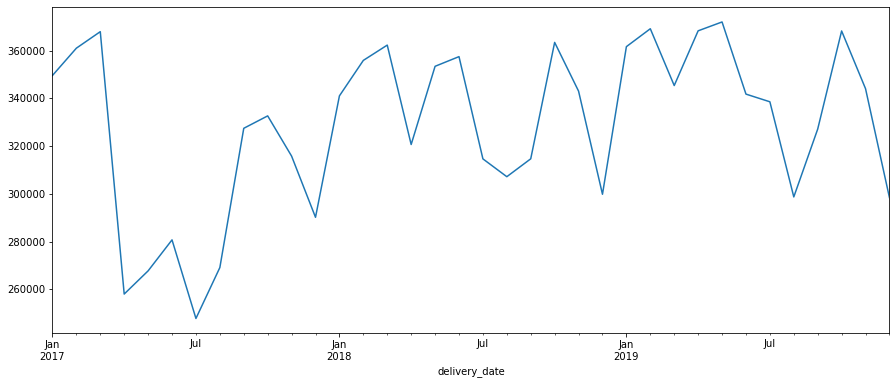

In [88]:
y.plot(figsize=(15, 6))
plt.show()

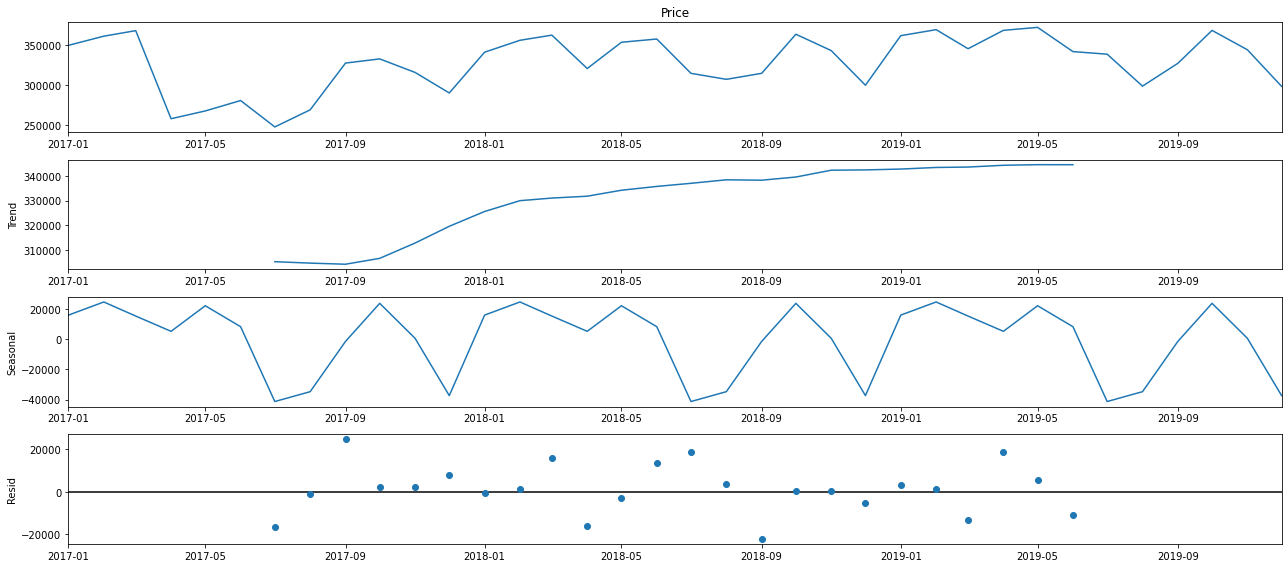

In [89]:
from pylab import rcParams
import statsmodels.api as sm

rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [90]:
import itertools

p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [91]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:990.8086587822096
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1307.6843228951734
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:551.4019939595531
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:254.65549729166906
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:568.4168883967332
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:544.4000604404538
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:272.8496870039418
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:256.0638290721414
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:939.5965070144679
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:607.767554638711
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:522.1055932848725
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:234.7643073548988
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:659.8687402774735
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:607.3266312956558
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:278.98904186946146
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:235.21345765405493
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:811.3566711750359
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:515.117769312444
ARIMA(0,

In [92]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4628      1.008     -0.459      0.646      -2.438       1.512
ma.L1         -0.7254      0.332     -2.184      0.029      -1.376      -0.074
ma.S.L12       0.0366      0.612      0.060      0.952      -1.163       1.236
sigma2       7.14e+08      5e-10   1.43e+18      0.000    7.14e+08    7.14e+08


In [95]:
pred = results.get_prediction(start=pd.to_datetime('2020-01-01'), dynamic=False)
pred_ci = pred.conf_int()
pred_ci

,lower Price,upper Price
2020-01-01,316436.73451,421178.157188


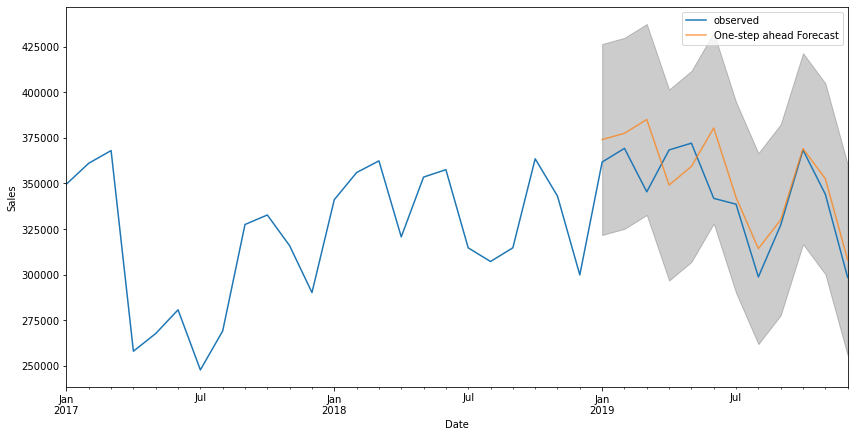

In [102]:
pred = results.get_prediction(start=pd.to_datetime('2019-01-01'), dynamic=False)
pred_ci = pred.conf_int()

ax = y['2017':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Sales')
plt.legend()
plt.show()

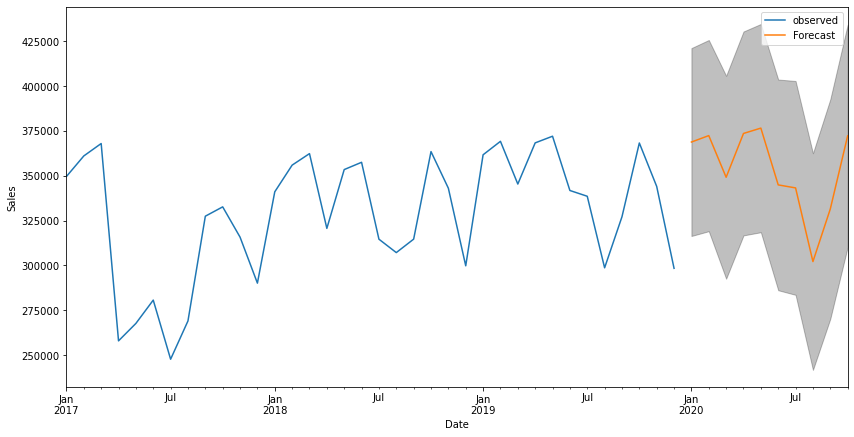

In [104]:
pred_uc = results.get_forecast(steps=10)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
plt.legend()
plt.show()